In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('customer.csv')
data.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [3]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("custid", axis=1, inplace=True)
data.head()

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [4]:
patients = data.shape[0]
features = data.shape[1] - 1 

not_insured = len(data[data.health_ins == False])
insured = len(data[data.health_ins == True])
val = [not_insured, insured]

percentage_not_insured = (float(not_insured)/patients) * 100
percentage_insured = (float(insured)/patients) * 100

print(f'Total of patients:{patients}')
print(f'Total of columns:{features}')
print(f'Total of patients not insured:{percentage_not_insured} ({percentage_not_insured:.2f}%)')
print(f'Total of patients insured:{percentage_insured} ({percentage_insured:.2f}%)')

Total of patients:72458
Total of columns:12
Total of patients not insured:9.529658560821442 (9.53%)
Total of patients insured:90.47034143917855 (90.47%)


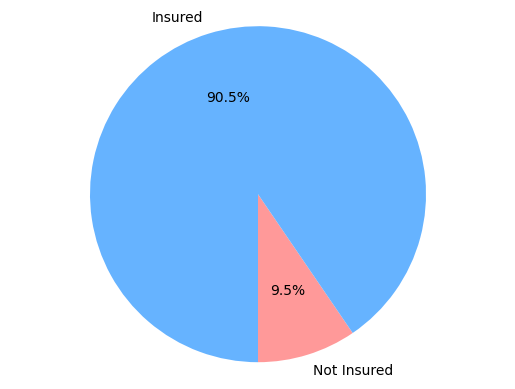

In [5]:
plt.pie(val, labels=["Not Insured", "Insured"], autopct='%1.1f%%', startangle=-90, colors=['#ff9999','#66b3ff'])
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.show()

In [6]:
data.columns

Index(['sex', 'is_employed', 'income', 'marital_status', 'health_ins',
       'housing_type', 'num_vehicles', 'age', 'state_of_res', 'code_column',
       'gas_usage', 'rooms', 'recent_move_b'],
      dtype='object')

In [7]:
data.isna().sum()

sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

In [8]:
data['is_employed'] = data['is_employed'].fillna(False)
data["is_employed"].unique()

/tmp/ipykernel_8868/299261139.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_employed'] = data['is_employed'].fillna(False)


array([ True, False])

In [9]:
data.isna().sum()

sex                  0
is_employed          0
income               0
marital_status       0
health_ins           0
housing_type      1686
num_vehicles      1686
age                  0
state_of_res         0
code_column          0
gas_usage         1686
rooms                0
recent_move_b     1687
dtype: int64

In [10]:
data.dropna(inplace=True)
data

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,Female,False,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,Female,False,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72452,Female,True,85000.0,Married,True,Homeowner with mortgage/loan,2.0,32,Wyoming,131,70.0,5,F
72453,Female,True,18500.0,Never married,False,Rented,1.0,25,Wyoming,131,10.0,4,F
72454,Female,False,20800.0,Widowed,True,Homeowner free and clear,1.0,86,Wyoming,131,120.0,6,F
72455,Male,True,75000.0,Married,True,Homeowner with mortgage/loan,2.0,50,Wyoming,131,90.0,3,F


In [11]:
np.sort(data["age"].unique())

array([  0,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96, 100,
       110, 114, 120])

In [12]:
(data['age'] == 0).sum()

np.int64(76)

In [13]:
data['age'] = data['age'].replace(0, np.nan)
data["age"].isna().sum()

np.int64(76)

In [14]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,is_employed,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,sex_Male,marital_status_Married,...,state_of_res_Tennessee,state_of_res_Texas,state_of_res_Utah,state_of_res_Vermont,state_of_res_Virginia,state_of_res_Washington,state_of_res_West Virginia,state_of_res_Wisconsin,state_of_res_Wyoming,recent_move_b_T
0,True,22000.0,True,0.0,24.0,1047,210.0,3,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,23200.0,True,0.0,82.0,1047,3.0,6,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,21000.0,True,2.0,31.0,1047,40.0,3,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,37770.0,True,1.0,93.0,1047,120.0,2,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,39000.0,True,2.0,67.0,1047,3.0,2,True,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
from scipy.stats import zscore

numerical_cols = data.select_dtypes(include=[np.number])
z_scores = numerical_cols.apply(zscore, nan_policy='omit')
z_scores_df = pd.DataFrame(z_scores, columns=numerical_cols.columns)


In [16]:
z_scores_df

,income,num_vehicles,age,code_column,gas_usage,rooms
0,-0.351835,-1.766462,-1.413978,-0.841918,2.672545,-0.290145
1,-0.331371,-1.766462,1.831783,-0.841918,-0.605409,1.467789
2,-0.368887,-0.057134,-1.022248,-0.841918,-0.019494,-0.290145
3,-0.082913,-0.911798,2.447359,-0.841918,1.247348,-0.876123
4,-0.061938,-0.057134,0.992362,-0.841918,-0.605409,-0.876123
...,...,...,...,...,...,...
72452,0.722487,-0.057134,-0.966287,-1.185832,0.455572,0.881811
72453,-0.411519,-0.911798,-1.358016,-1.185832,-0.494560,0.295833
72454,-0.372298,-0.911798,2.055629,-1.185832,1.247348,1.467789
72455,0.551960,-0.057134,0.041019,-1.185832,0.772282,-0.290145


In [17]:
np.sort(z_scores_df["age"].unique())

array([-1.58186208, -1.52590068, -1.46993927, -1.41397787, -1.35801647,
       -1.30205507, -1.24609367, -1.19013227, -1.13417086, -1.07820946,
       -1.02224806, -0.96628666, -0.91032526, -0.85436386, -0.79840245,
       -0.74244105, -0.68647965, -0.63051825, -0.57455685, -0.51859545,
       -0.46263404, -0.40667264, -0.35071124, -0.29474984, -0.23878844,
       -0.18282704, -0.12686563, -0.07090423, -0.01494283,  0.04101857,
        0.09697997,  0.15294137,  0.20890278,  0.26486418,  0.32082558,
        0.37678698,  0.43274838,  0.48870979,  0.54467119,  0.60063259,
        0.65659399,  0.71255539,  0.76851679,  0.8244782 ,  0.8804396 ,
        0.936401  ,  0.9923624 ,  1.0483238 ,  1.1042852 ,  1.16024661,
        1.21620801,  1.27216941,  1.32813081,  1.38409221,  1.44005361,
        1.49601502,  1.55197642,  1.60793782,  1.66389922,  1.71986062,
        1.77582202,  1.83178343,  1.88774483,  1.94370623,  1.99966763,
        2.05562903,  2.11159043,  2.16755184,  2.22351324,  2.27

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(z_scores_df)

# Step 5: Replace the original 'age' column with the imputed values
z_scores_df['age'] = imputed_data[:, 4]

In [19]:
imputed_data

array([[-0.35183473, -1.76646217, -1.41397787, -0.84191797,  2.67254481,
        -0.29014478],
       [-0.33137146, -1.76646217,  1.83178343, -0.84191797, -0.60540855,
         1.4677888 ],
       [-0.36888746, -0.0571338 , -1.02224806, -0.84191797, -0.01949418,
        -0.29014478],
       ...,
       [-0.372298  , -0.91179799,  2.05562903, -1.18583214,  1.2473477 ,
         1.4677888 ],
       [ 0.55195987, -0.0571338 ,  0.04101857, -1.18583214,  0.77228199,
        -0.29014478],
       [-0.34842418, -0.91179799,  0.65659399, -1.18583214,  0.13886106,
         1.4677888 ]])

In [20]:
np.sort(z_scores_df['age'].unique())

array([-0.63707959, -0.62124407, -0.60540855, -0.58957302, -0.49455988,
       -0.33620465, -0.17784941, -0.01949418,  0.13886106,  0.29721629,
        0.45557153,  0.61392676,  0.77228199,  0.93063723,  1.08899246,
        1.2473477 ,  1.40570293,  1.56405817,  1.7224134 ,  1.88076863,
        2.03912387,  2.1974791 ,  2.35583434,  2.51418957,  2.67254481,
        2.83090004,  2.98925528,  3.14761051,  3.30596574,  3.46432098,
        3.62267621,  3.78103145,  3.93938668,  4.09774192,  4.25609715,
        4.41445238,  4.57280762,  4.73116285,  4.88951809,  5.04787332,
        5.20622856,  5.36458379,  5.52293902,  5.68129426,  5.83964949,
        5.99800473,  6.15635996,  6.3147152 ,  6.47307043,  6.63142567,
        6.7897809 ,  6.94813613,  7.10649137,  7.42320184,  7.58155707,
        7.89826754,  8.37333324])

In [21]:
(data['age'] == 0).sum()

np.int64(0)

In [22]:
z_scores_df


,income,num_vehicles,age,code_column,gas_usage,rooms
0,-0.351835,-1.766462,2.672545,-0.841918,2.672545,-0.290145
1,-0.331371,-1.766462,-0.605409,-0.841918,-0.605409,1.467789
2,-0.368887,-0.057134,-0.019494,-0.841918,-0.019494,-0.290145
3,-0.082913,-0.911798,1.247348,-0.841918,1.247348,-0.876123
4,-0.061938,-0.057134,-0.605409,-0.841918,-0.605409,-0.876123
...,...,...,...,...,...,...
72452,0.722487,-0.057134,0.455572,-1.185832,0.455572,0.881811
72453,-0.411519,-0.911798,-0.494560,-1.185832,-0.494560,0.295833
72454,-0.372298,-0.911798,1.247348,-1.185832,1.247348,1.467789
72455,0.551960,-0.057134,0.772282,-1.185832,0.772282,-0.290145


In [23]:
z_scores.columns

Index(['income', 'num_vehicles', 'age', 'code_column', 'gas_usage', 'rooms'], dtype='object')

In [24]:
data['income'] = z_scores_df["income"]
data['num_vehicles'] = z_scores_df["num_vehicles"]
data['age'] = z_scores_df["age"]
data['code_column'] = z_scores_df["code_column"]
data['gas_usage'] = z_scores_df["gas_usage"]
data['rooms'] = z_scores_df["rooms"]


In [25]:
data.head()

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,Male,True,-0.351835,Never married,True,Homeowner free and clear,-1.766462,2.672545,Alabama,-0.841918,2.672545,-0.290145,F
1,Female,False,-0.331371,Divorced/Separated,True,Rented,-1.766462,-0.605409,Alabama,-0.841918,-0.605409,1.467789,T
2,Female,True,-0.368887,Never married,True,Homeowner with mortgage/loan,-0.057134,-0.019494,Alabama,-0.841918,-0.019494,-0.290145,F
3,Female,False,-0.082913,Widowed,True,Homeowner free and clear,-0.911798,1.247348,Alabama,-0.841918,1.247348,-0.876123,F
4,Male,True,-0.061938,Divorced/Separated,True,Rented,-0.057134,-0.605409,Alabama,-0.841918,-0.605409,-0.876123,F


In [26]:
data.isna().sum()

sex               0
is_employed       0
income            0
marital_status    0
health_ins        0
housing_type      0
num_vehicles      0
age               0
state_of_res      0
code_column       0
gas_usage         0
rooms             0
recent_move_b     0
dtype: int64

In [27]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,is_employed,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,sex_Male,marital_status_Married,...,state_of_res_Tennessee,state_of_res_Texas,state_of_res_Utah,state_of_res_Vermont,state_of_res_Virginia,state_of_res_Washington,state_of_res_West Virginia,state_of_res_Wisconsin,state_of_res_Wyoming,recent_move_b_T
0,True,-0.351835,True,-1.766462,2.672545,-0.841918,2.672545,-0.290145,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,-0.331371,True,-1.766462,-0.605409,-0.841918,-0.605409,1.467789,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,-0.368887,True,-0.057134,-0.019494,-0.841918,-0.019494,-0.290145,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,-0.082913,True,-0.911798,1.247348,-0.841918,1.247348,-0.876123,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,-0.061938,True,-0.057134,-0.605409,-0.841918,-0.605409,-0.876123,True,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
patients = data_encoded.shape[0]
features = data_encoded.shape[1] - 1 

not_insured = len(data_encoded[data_encoded.health_ins == False])
insured = len(data[data_encoded.health_ins == True])
val = [not_insured, insured]

percentage_not_insured = (float(not_insured)/patients) * 100
percentage_insured = (float(insured)/patients) * 100

print(f'Total of patients:{patients}')
print(f'Total of columns:{features}')
print(f'Total of patients not insured:{percentage_not_insured}({percentage_not_insured:.2f}%)')
print(f'Total of patients insured:{percentage_insured}({percentage_insured:.2f}%)')

Total of patients:70771
Total of columns:65
Total of patients not insured:9.089881448615959(9.09%)
Total of patients insured:90.91011855138404(90.91%)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data_encoded.drop(columns=['health_ins'])  # Features (drop the target and any non-relevant columns)
y = data_encoded['health_ins']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)  # You can adjust n_estimators
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 6: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


Feature: 0, Score: 0.02359
Feature: 1, Score: 0.26561
Feature: 2, Score: 0.09879
Feature: 3, Score: 0.07580
Feature: 4, Score: 0.05267
Feature: 5, Score: 0.07548
Feature: 6, Score: 0.12599
Feature: 7, Score: 0.02651
Feature: 8, Score: 0.01694
Feature: 9, Score: 0.01826
Feature: 10, Score: 0.00557
Feature: 11, Score: 0.01535
Feature: 12, Score: 0.00471
Feature: 13, Score: 0.02139
Feature: 14, Score: 0.00167
Feature: 15, Score: 0.00442
Feature: 16, Score: 0.00222
Feature: 17, Score: 0.00596
Feature: 18, Score: 0.00365
Feature: 19, Score: 0.00193
Feature: 20, Score: 0.00081
Feature: 21, Score: 0.00051
Feature: 22, Score: 0.00528
Feature: 23, Score: 0.00657
Feature: 24, Score: 0.00069
Feature: 25, Score: 0.00182
Feature: 26, Score: 0.00514
Feature: 27, Score: 0.00428
Feature: 28, Score: 0.00154
Feature: 29, Score: 0.00218
Feature: 30, Score: 0.00228
Feature: 31, Score: 0.00415
Feature: 32, Score: 0.00108
Feature: 33, Score: 0.00379
Feature: 34, Score: 0.00236
Feature: 35, Score: 0.00373
Fe

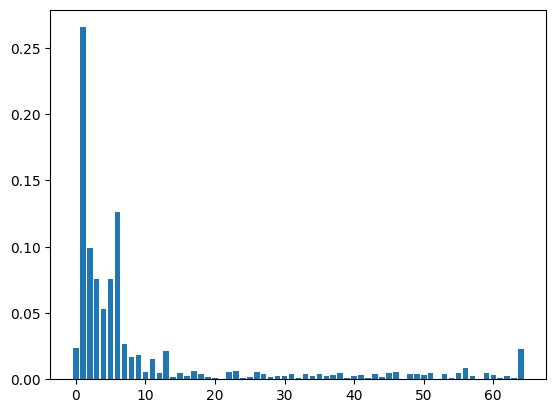

In [30]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = data_encoded.drop(columns=['health_ins'])  # Features (drop the target and any non-relevant columns)
y = data_encoded['health_ins']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier()  # You can adjust n_estimators
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 6: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [ ]:
from sklearn.inspection import permutation_importance

results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data_encoded.drop(columns=['health_ins'])  # Features (drop the target and any non-relevant columns)
y = data_encoded['health_ins']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()  # You can adjust n_estimators
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 6: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


Feature: 0, Score: 0.05818
Feature: 1, Score: 0.02939
Feature: 2, Score: 0.01144
Feature: 3, Score: 0.01015
Feature: 4, Score: 0.01208
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00909
Feature: 7, Score: 0.03235
Feature: 8, Score: 0.02578
Feature: 9, Score: 0.01728
Feature: 10, Score: 0.04449
Feature: 11, Score: 0.01456
Feature: 12, Score: 0.02266
Feature: 13, Score: 0.06873
Feature: 14, Score: 0.01940
Feature: 15, Score: 0.01198
Feature: 16, Score: 0.00988
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.01381
Feature: 19, Score: 0.00610
Feature: 20, Score: 0.00315
Feature: 21, Score: 0.00431
Feature: 22, Score: 0.02867
Feature: 23, Score: 0.02989
Feature: 24, Score: 0.01097
Feature: 25, Score: 0.01141
Feature: 26, Score: 0.01273
Feature: 27, Score: 0.01638
Feature: 28, Score: 0.00712
Feature: 29, Score: 0.00914
Feature: 30, Score: 0.00814
Feature: 31, Score: 0.02172
Feature: 32, Score: 0.00737
Feature: 33, Score: 0.01102
Feature: 34, Score: 0.03663
Feature: 35, Score: 0.01462
Fe

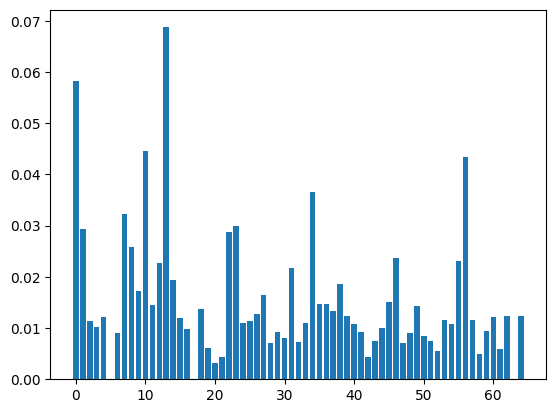

In [34]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data_encoded.drop(columns=['health_ins'])  # Features (drop the target and any non-relevant columns)
y = data_encoded['health_ins']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = svm.SVC()  # You can adjust n_estimators
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 6: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')